<a href="https://colab.research.google.com/github/kain-shekar/Machine_learning_Projects/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
# load dataset
df = pd.read_csv('clean_dataset.csv')

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
df.shape

(690, 16)

In [ ]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [ ]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

### To identify object columns

In [ ]:

def toCheckUnique(df):
    for col in df.columns:
        print(col," unique values are")
        print(df[col].unique())

In [ ]:
toCheckUnique(df)

Gender  unique values are
[1 0]
Age  unique values are
[30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83 28.46 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08
 32.75 68.67 28.   44.   25.08 32.   60.58 40.83 19.33 41.33 56.   49.83
 22.67 27.   26.08 18.42 21.25 57.08 22.42 48.75 40.   40.58 28.67 33.08


Gender: Binary values (0, 1).
Age: Continuous values (e.g., 30.83, 58.67, 24.5, ...).
Debt: Continuous values (e.g., 0.0, 4.46, 0.5, ...).
Married: Binary values (0, 1).
BankCustomer: Binary values (0, 1).
Industry: Categorical values (e.g., 'Industrials', 'Materials', 'Healthcare', ...).
Ethnicity: Categorical values (e.g., 'White', 'Black', 'Asian', ...).
YearsEmployed: Continuous values (e.g., 1.25, 3.04, 0.04, ...).
PriorDefault: Binary values (0, 1).
Employed: Binary values (0, 1).
CreditScore: Discrete values (e.g., 1, 6, 0, ...).
DriversLicense: Binary values (0, 1).
Citizen: Categorical values ('ByBirth', 'ByOtherMeans', 'Temporary').
ZipCode: Discrete values (e.g., 202, 43, 280, ...).
Income: Continuous values (e.g., 0, 560, 31285, ...).

## Data preprocessing

In [ ]:
# there is no null values
# there is no missing values
df.isnull().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [ ]:
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


## coverting categorical features into numerical features
* label Ecoding
*  one-hot Encoding

In [ ]:
col = df.select_dtypes(include='object')
col

,Industry,Ethnicity,Citizen
0,Industrials,White,ByBirth
1,Materials,Black,ByBirth
2,Materials,Black,ByBirth
3,Industrials,White,ByBirth
4,Industrials,White,ByOtherMeans
...,...,...,...
685,Education,Black,ByBirth
686,Energy,White,ByBirth
687,Healthcare,Latino,ByBirth
688,ConsumerStaples,White,ByBirth


In [ ]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = df.select_dtypes(include='object')
for col in columns:
    df[col] = encoder.fit_transform(df[col])
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,3,1,1.25,0,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,4,4,2.00,0,1,2,1,0,200,394,0
687,0,25.25,13.500,0,0,6,2,2.00,0,1,1,1,0,200,1,0
688,1,17.92,0.205,1,1,2,4,0.04,0,0,0,0,0,280,750,0


## Exploratory Data Analysis

AttributeError: module 'matplotlib' has no attribute 'show'

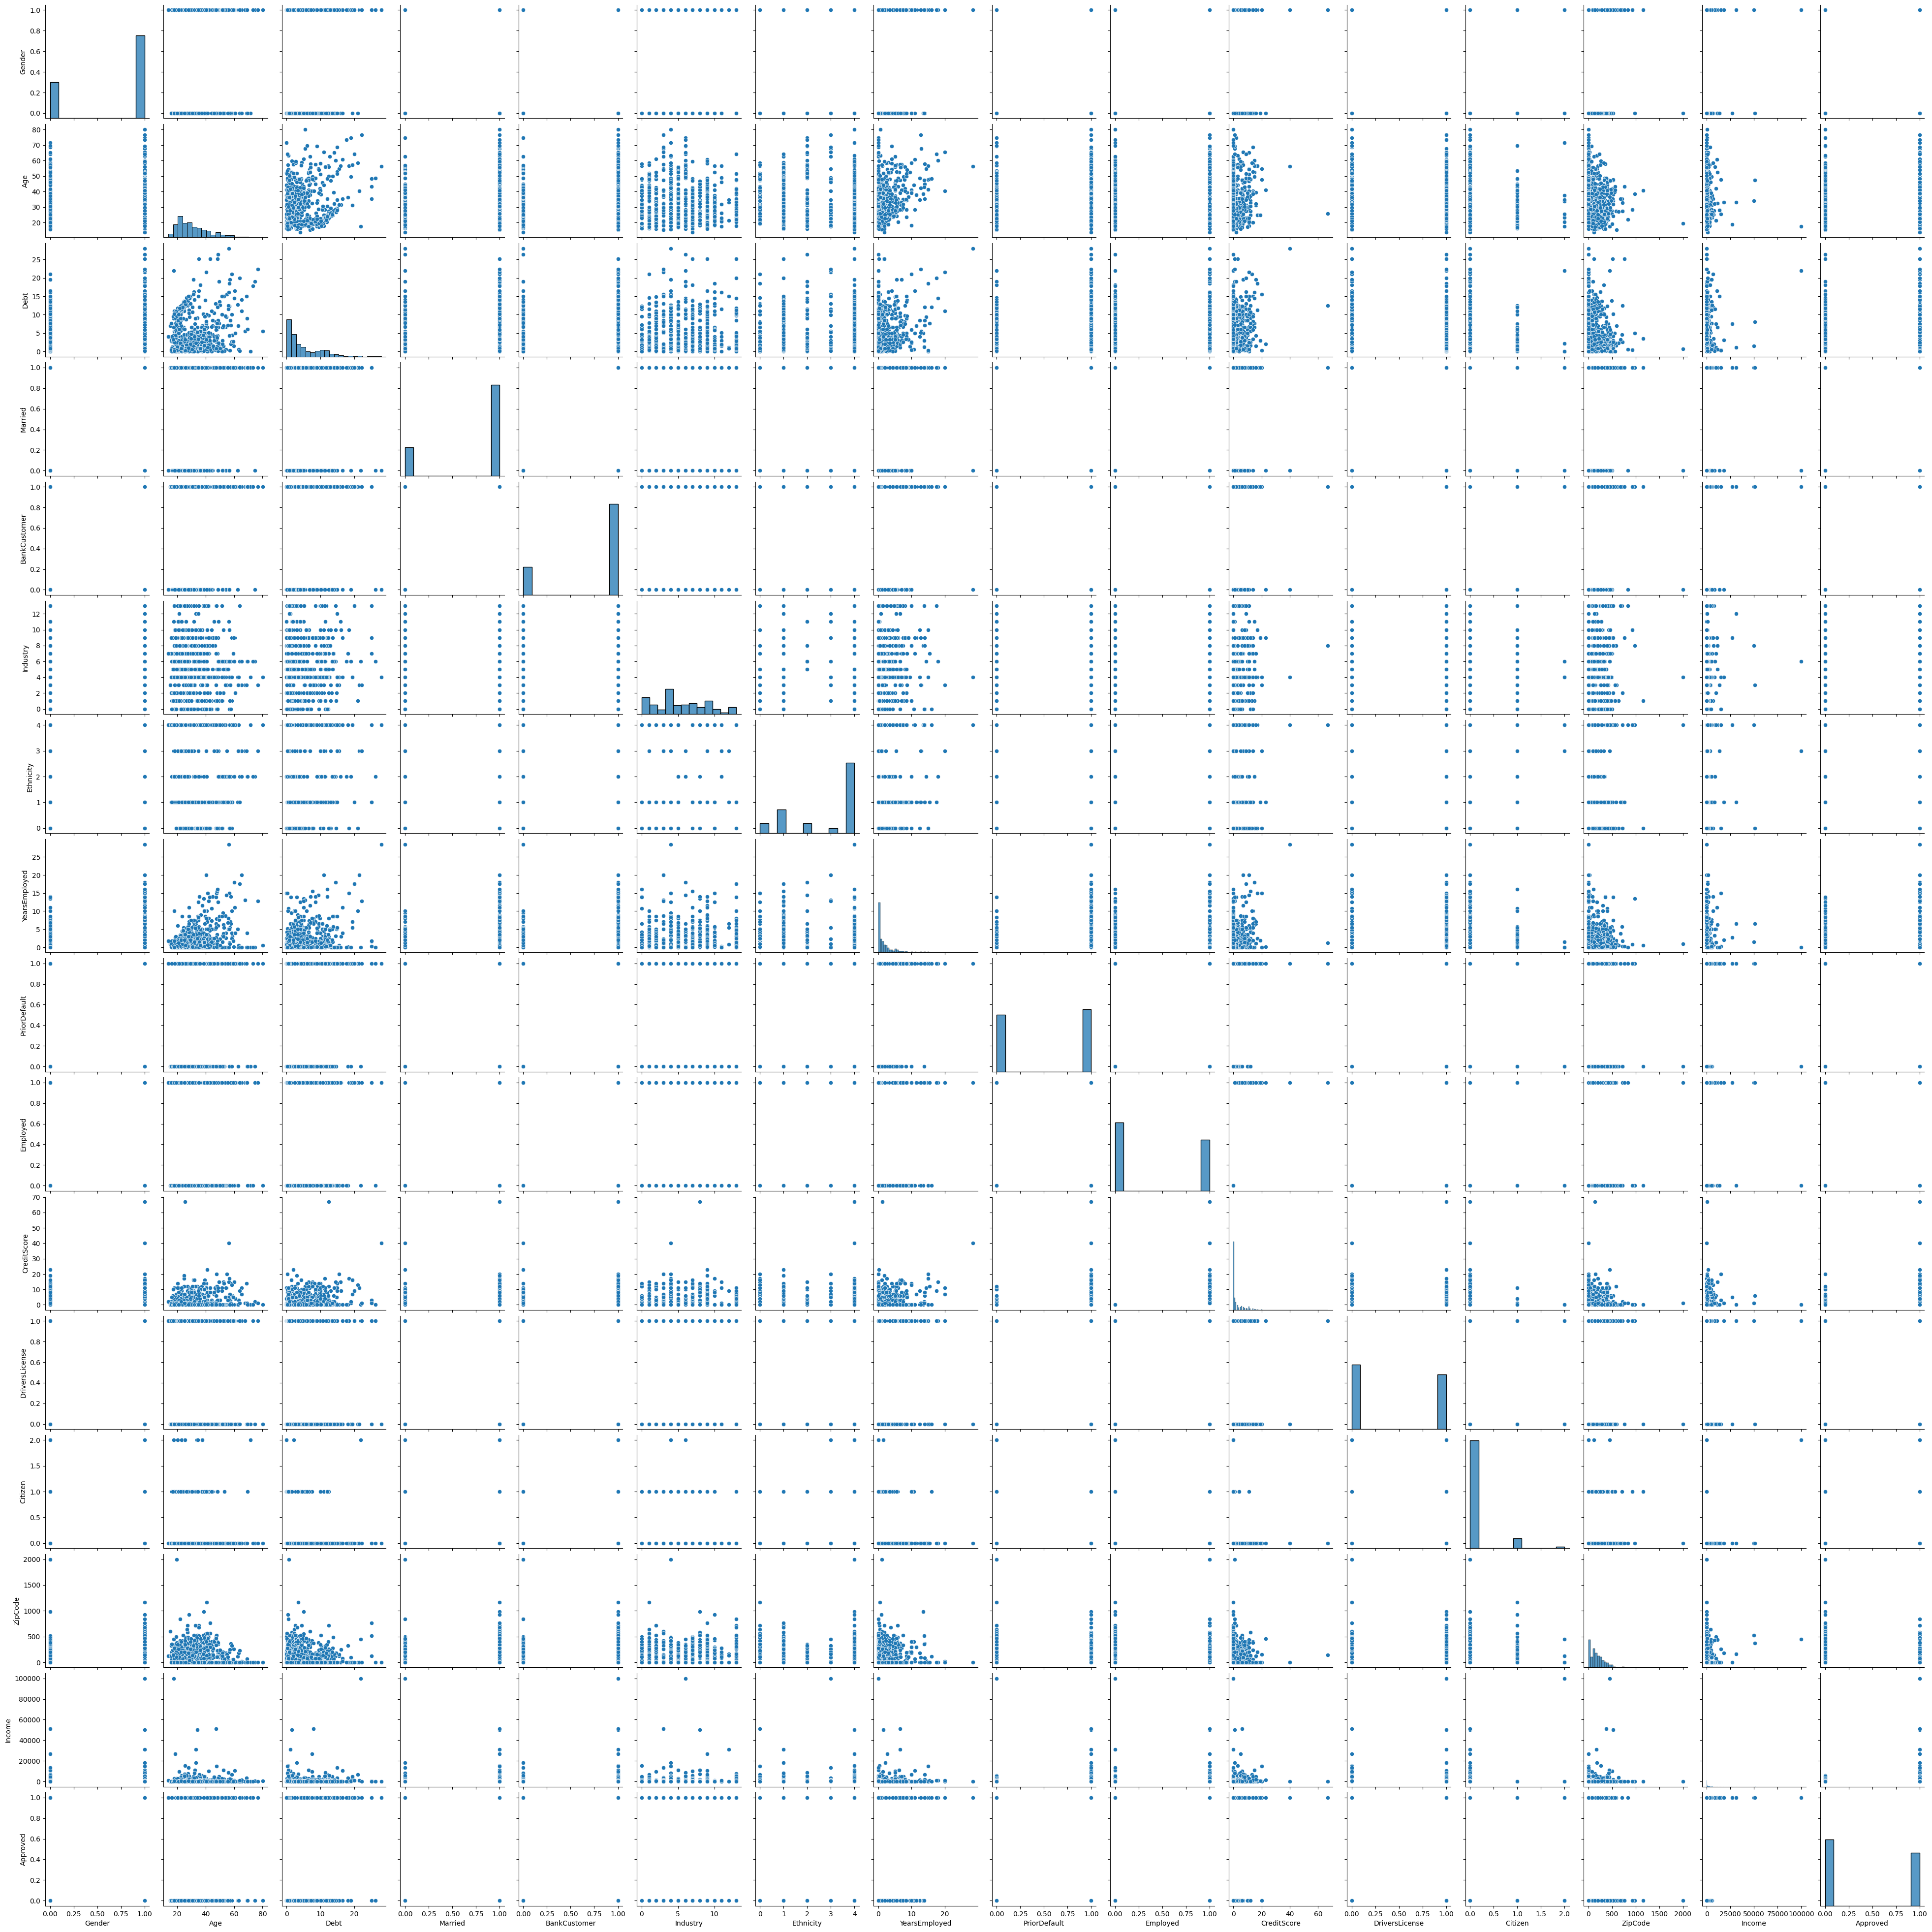

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [ ]:
df["Ethnicity"]

,Ethnicity
0,4
1,1
2,1
3,4
4,4
...,...
685,1
686,4
687,2
688,4


### Correlation between features

In [ ]:
df.corr().sum()

,0
Gender,0.911769
Age,2.245841
Debt,2.278409
Married,2.810985
BankCustomer,2.917615
Industry,1.503904
Ethnicity,0.270318
YearsEmployed,3.079279
PriorDefault,3.605389
Employed,3.127199


# Gender , Ethnicity , citizen , ZipCode this features havinng less Correaltion
* need to drop this features

In [ ]:
columns = ['Gender' , 'Ethnicity' ,'Citizen' , 'ZipCode']
df.drop(columns=columns,inplace = True)
df.head(2)

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,30.83,0.00,1,1,7,1.25,1,1,1,0,0,1
1,58.67,4.46,1,1,9,3.04,1,1,6,0,560,1


In [ ]:
def toCheckUnique(df):
    for col in df.columns:
        print(col," unique values are")
        print(df[col].unique())


In [ ]:
toCheckUnique(df)

Age  unique values are
[30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83 28.46 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08
 32.75 68.67 28.   44.   25.08 32.   60.58 40.83 19.33 41.33 56.   49.83
 22.67 27.   26.08 18.42 21.25 57.08 22.42 48.75 40.   40.58 28.67 33.08
 21.33 41.75 34.5  48.17 27.58 2

## Visualization of Correlation

AttributeError: module 'matplotlib' has no attribute 'title'

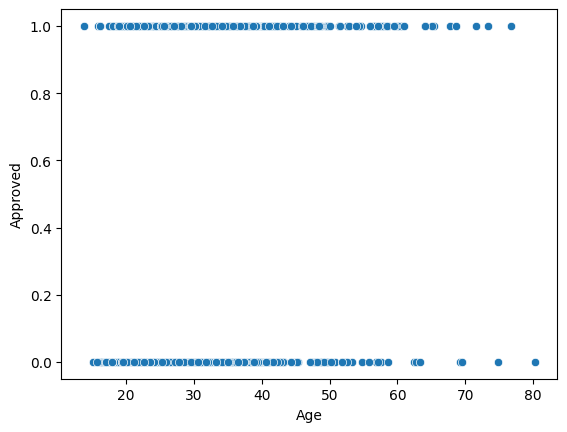

In [ ]:

sns.scatterplot(x='Age', y='Approved', data=df)
plt.title('Scatterplot of CreditScore vs Approved')
plt.xlabel('CreditScore')
plt.ylabel('Approved')
plt.show()

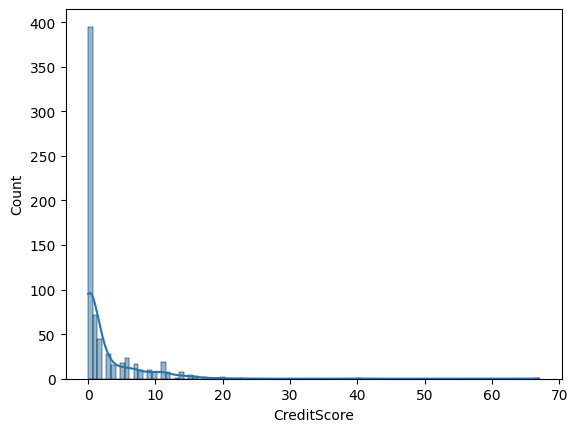

In [ ]:
#to check normal Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CreditScore'],kde=True)
plt.show()

### split Dependent colums and independent columns

In [ ]:
# dependent features
X = df.drop(columns='Approved')

# dependent Feature
y = df['Approved']


In [ ]:
print(X)
print(y)

       Age    Debt  Married  BankCustomer  Industry  YearsEmployed  \
0    30.83   0.000        1             1         7           1.25   
1    58.67   4.460        1             1         9           3.04   
2    24.50   0.500        1             1         9           1.50   
3    27.83   1.540        1             1         7           3.75   
4    20.17   5.625        1             1         7           1.71   
..     ...     ...      ...           ...       ...            ...   
685  21.08  10.085        0             0         3           1.25   
686  22.67   0.750        1             1         4           2.00   
687  25.25  13.500        0             0         6           2.00   
688  17.92   0.205        1             1         2           0.04   
689  35.00   3.375        1             1         4           8.29   

     PriorDefault  Employed  CreditScore  DriversLicense  Income  
0               1         1            1               0       0  
1               1        

### split into X_test , y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(y_train.value_counts())
print(X_train.shape , y_train.shape)

Approved
0    315
1    237
Name: count, dtype: int64
(552, 11) (552,)


### To convert into Normal Distribution
* Min-Max scaler
* standardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardScaler(X,y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.transform(y)
    return X_scaled,y_scaled


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_df =  scaler.fit_transform(df)

In [ ]:
X_train_scaled ,X_test_scaled = standardScaler(X_train,X_test)

In [ ]:
a = pd.DataFrame(X_train_scaled,columns=X.columns)
a

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
0,-0.581957,1.852077,-1.740459,-1.748949,0.189110,-0.701236,-1.025692,-0.867399,-0.495033,-0.909843,-0.192364
1,-0.191330,-0.229966,0.574561,0.571772,0.491685,0.497087,0.974951,1.152872,0.123665,1.099091,-0.192364
2,0.715879,-0.854579,0.574561,0.571772,-1.626342,-0.615641,0.974951,-0.867399,-0.495033,-0.909843,-0.192364
3,-0.461110,-0.750477,0.574561,0.571772,1.096835,-0.102075,0.974951,-0.867399,-0.495033,1.099091,-0.192364
4,1.914995,1.045285,0.574561,0.571772,-0.718616,2.265469,0.974951,1.152872,0.536130,-0.909843,-0.192364
...,...,...,...,...,...,...,...,...,...,...,...
547,0.290359,-0.125864,0.574561,0.571772,1.399410,3.578488,0.974951,-0.867399,-0.495033,1.099091,-0.192364
548,-0.227074,-0.716123,0.574561,0.571772,-0.113466,-0.530047,0.974951,-0.867399,-0.495033,-0.909843,-0.192364
549,0.524395,-0.958681,0.574561,0.571772,-0.416041,-0.701236,-1.025692,-0.867399,-0.495033,-0.909843,-0.192364
550,-1.056838,-0.958681,-1.740459,-1.748949,0.189110,-0.701236,-1.025692,1.152872,0.329897,-0.909843,-0.192155


In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(552, 11)
(138, 11)


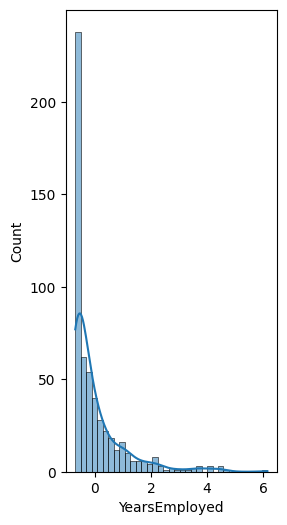

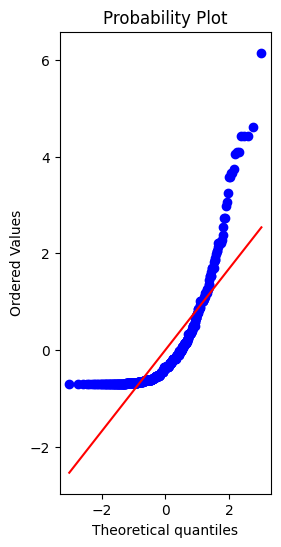

In [ ]:
# to check normal Distribution
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
sns.histplot(a['YearsEmployed'], kde=True)

# Q-Q Plot for normality check
plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
stats.probplot(a['YearsEmployed'], dist="norm", plot=plt)
plt.show()


## Model Creation
* This is a classification probelm for this we have some models like
  1. logistic Regression
  2. Decision Tress
  3. Random Forest
  4. k-Nearest Neighbors (k-NN)
  5. support vector machine (svm)

In [ ]:
# logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report

log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)


LogisticRegression()

In [ ]:
# to predict the output
y_pred1=log_model.predict(X_test_scaled)
y_pred1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1])

In [ ]:
# Evalute the model

def checkAccuracy(y_test,y_pred):
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

In [ ]:
checkAccuracy(y_test,y_pred1)

Accuracy: 0.83
Confusion Matrix:
[[55 13]
 [11 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        68
           1       0.82      0.84      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



In [ ]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 5)
DTC.fit(X_train_scaled ,y_train)
y_pred2=DTC.predict(X_test_scaled)

# Accuracy
checkAccuracy(y_test,y_pred2)


Accuracy: 0.80
Confusion Matrix:
[[57 11]
 [16 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        68
           1       0.83      0.77      0.80        70

    accuracy                           0.80       138
   macro avg       0.81      0.80      0.80       138
weighted avg       0.81      0.80      0.80       138



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
y_pred3 = rfc.predict(X_test_scaled)

checkAccuracy(y_test,y_pred3)


Accuracy: 0.85
Confusion Matrix:
[[61  7]
 [14 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        68
           1       0.89      0.80      0.84        70

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

